In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/DATA/Financial Dataset.csv')
print("Data info")
df.info()

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#PRINTING FIRST 5 ROWS
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
#CHECKING FOR MISSING VALUES IN EACH COLUMN
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
#DISTRIBUTION OF TARGET VARIABLE STATUS
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Axes: >

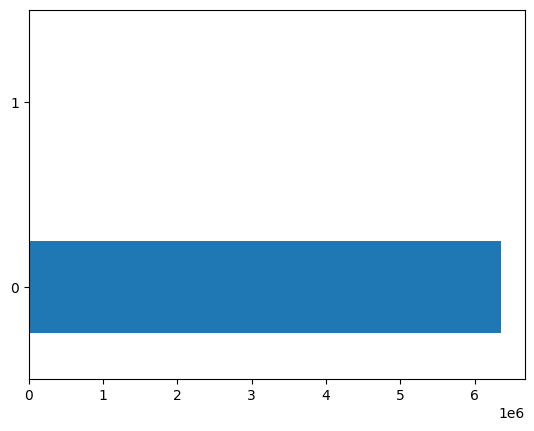

In [9]:
df['isFraud'].value_counts().plot(kind = 'barh')

DATA PREPROCESSING AND EXPLORATION

TRAIN TEST SPLIT

In [10]:
#SEPERATING THE FEATURES FROM TARGET VARIABLE STATUS
X = df.drop(columns=["step", "type", "nameOrig", "nameDest", "isFraud"],axis=1)
Y = df["isFraud"]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2, random_state = 2)

### Apply SMOTE to balance the dataset

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [14]:
from collections import Counter

In [15]:
print("Class distribution before SMOTE:", Counter(Y_train))

Class distribution before SMOTE: Counter({0: 5083482, 1: 6614})


In [16]:
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

Class distribution after SMOTE: Counter({0: 5083482, 1: 5083482})


DATA STANDARDIZATION

In [17]:
from sklearn.preprocessing import StandardScaler

# Data standardization
scaler = StandardScaler()
scaler.fit(X_train_resampled)
X_train_resampled = scaler.transform(X_train_resampled)
X_test = scaler.transform(X_test)

DATA VISUALIZATION

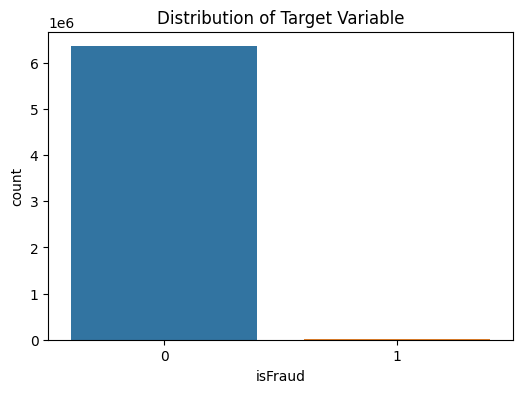

In [18]:
#DISTRIBUTION OF TARGET VARIABLE STATUS
df['isFraud'].value_counts()

# Plot of the distribution of the target variable
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df)
plt.title("Distribution of Target Variable")
plt.show()



               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

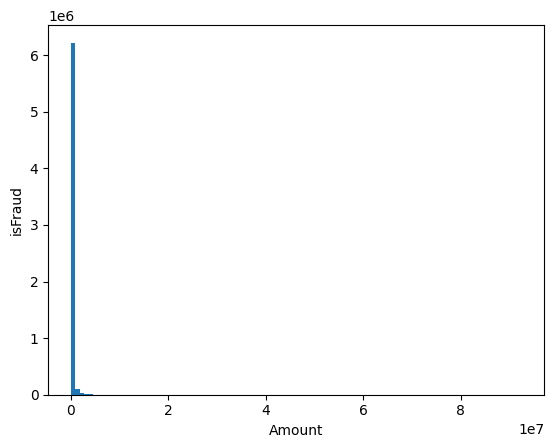

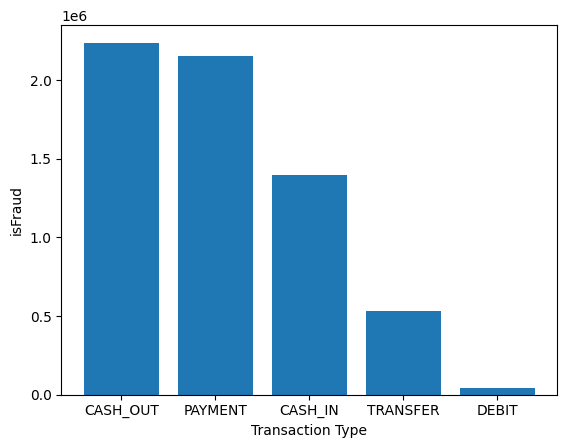

In [19]:
import matplotlib.pyplot as plt
print(df.describe())

# Histogram of the 'amount' column
plt.hist(df['amount'], bins=100)
plt.xlabel('Amount')
plt.ylabel('isFraud')
plt.show()

# Bar chart of the 'type' column
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values)
plt.xlabel('Transaction Type')
plt.ylabel('isFraud')
plt.show()

MODELS

LOGISTIC REGRESSION

Logistic Regression Accuracy: 0.969175434019319
Confusion Matrix:
[[1231877   39048]
 [    177    1422]]
Sensitivity: 0.8893
Specificity: 0.9693
Balanced Accuracy: 0.9293
Precision: 0.0351
F1-Score: 0.0676


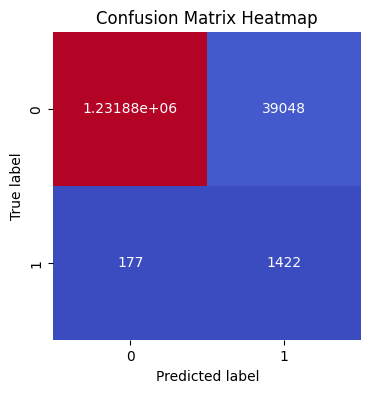

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score


y_true = Y_test
y_pred = logistic_regression_predictions

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Metrics
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


RANDOM FOREST

Random Forest Accuracy: 0.9989988401004618
Confusion Matrix:
[[1269704    1221]
 [     53    1546]]
Sensitivity: 0.9669
Specificity: 0.9990
Balanced Accuracy: 0.9829
Precision: 0.5587
F1-Score: 0.7082


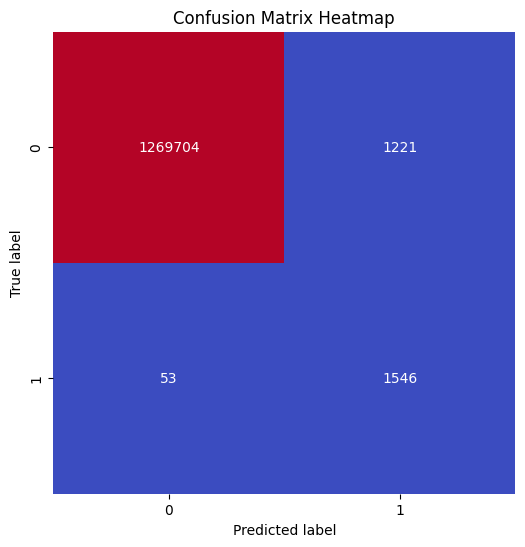

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, f1_score, balanced_accuracy_score


y_true = Y_test
y_pred = random_forest_predictions

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Metrics
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


HYPERPARAMETER TUNING OF BEST MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Logistic Regression Accuracy: 0.17341755440368906
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Confusion Matrix:
[[ 219526 1051399]
 [    447    1152]]
Sensitivity: 0.7205
Specificity: 0.1727
Balanced Accuracy: 0.4466
Precision: 0.0011
F1-Score: 0.0022


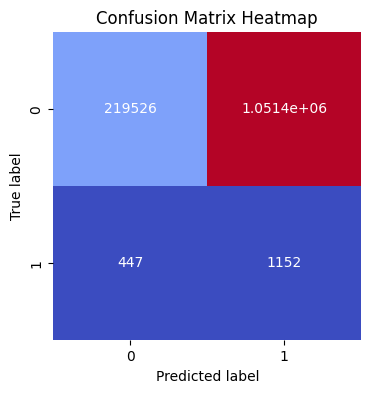

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
logistic_regression = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions and evaluation using the best model
logistic_regression_predictions = best_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
conf_matrix = confusion_matrix(Y_test, logistic_regression_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(Y_test, logistic_regression_predictions)
precision = precision_score(Y_test, logistic_regression_predictions)
f1 = f1_score(Y_test, logistic_regression_predictions)

# Print evaluation metrics
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


DEEP LEARNING MODEL

In [ ]:


import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict_classes(X_test)
predictions = predictions.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


Epoch 1/10
 44844/159066 [=======>......................] - ETA: 6:55 - loss: 115.5667 - accuracy: 0.9898

KeyboardInterrupt: ignored

A deep learning model is created using the Keras library. The model consists of three layers: two dense layers with 64 units and ReLU activation function, followed by an output layer with a sigmoid activation function. The model is compiled with the Adam optimizer and binary cross-entropy loss function. It is then trained on the training set for 10 epochs with a batch size of 32. The model is used to make predictions on the test set, and evaluation metrics such as accuracy, confusion matrix, sensitivity, specificity, balanced accuracy, precision, and F1-score are calculated. Finally, a heatmap of the confusion matrix is plotted using seaborn and matplotlib.

In [ ]:
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns


#path = "/Users/arjungr/Desktop/IE-5391 Weekly Reports/Financial Dataset.csv"


print("")
print("Missing entries")
print(df.isnull().sum()) #Printing missing entries
df = df.dropna() # drop missing cases

X = df.iloc[:, 4].values.reshape(-1, 1) # independent variables, oldbalanceOrg, can be changed to data column of choice.
y = df.iloc[:, 9].values.reshape(-1, 1) # dependent variable, isFraud
print("")
print("Shape")
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split #To split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
print("")
print("Using ML tool Lasso regression")
print("Find the R2 of train & test sets")
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))
print("This value is very low if the dependent variable (y) is column 9 (isFraud)")

print("")
lassoPred = reg.predict(X_test)
print("Lasso Regression predictions")
print(lassoPred)

plot.scatter(X_test, y_test, color = 'red')
plot.scatter(X_train, y_train, color = 'blue')
plot.xlabel("independent X column")
plot.ylabel("dependent isFraud column")
plot.show()

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
import matplotlib.pyplot as plt
print(df.describe())

# Histogram of the 'amount' column
plt.hist(df['amount'], bins=100)
plt.xlabel('Amount')
plt.ylabel('isFraud')
plt.show()

# Bar chart of the 'type' column
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values)
plt.xlabel('Transaction Type')
plt.ylabel('isFraud')
plt.show()



# Box plot of the 'oldbalanceOrg' and 'newbalanceOrig' columns
plt.boxplot([df['oldbalanceOrg'], df['newbalanceOrig']])
plt.xticks([1, 2], ['Old Balance', 'New Balance'])
plt.ylabel('isFraud')
plt.show()


In [ ]:
df.groupby('isFraud').count()

TRAINING THE MODELS AFTER BALANCING

In [ ]:
#Standardizing the balanced data

scaler.fit(X_train_resampled)
X_train_resampled = scaler.transform(X_train_resampled)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, Y_train_resampled)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score


y_true = Y_test
y_pred = logistic_regression_predictions

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Metrics
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, Y_train_resampled)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)

from sklearn.metrics import confusion_matrix, precision_score, f1_score, balanced_accuracy_score


y_true = Y_test
y_pred = random_forest_predictions

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Metrics
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Hyperparameter tuning of Best Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
logistic_regression = LogisticRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train_resampled, Y_train_resampled)

# Best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions and evaluation using the best model
logistic_regression_predictions = best_model.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
conf_matrix = confusion_matrix(Y_test, logistic_regression_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(Y_test, logistic_regression_predictions)
precision = precision_score(Y_test, logistic_regression_predictions)
f1 = f1_score(Y_test, logistic_regression_predictions)

# Print evaluation metrics
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Best Hyperparameters:", best_params)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Deep Learning Model

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into train and test sets
X_train_resampled, X_test, Y_train_resampled, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, Y_train_resampled, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict_classes(X_test)
predictions = predictions.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
balanced_accuracy = balanced_accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="coolwarm", cbar=False, square=True)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# CLASS DISTRIBUTION BEFORE AND AFTER SMOTE

In [ ]:
#Check the class distribution before SMOTE
class_distribution_before = Counter(Y_train)
print("Class distribution before SMOTE:", class_distribution_before)



# Check the class distribution after SMOTE
class_distribution_after = Counter(Y_train_resampled)
print("Class distribution after SMOTE:", class_distribution_after)

NameError: ignored

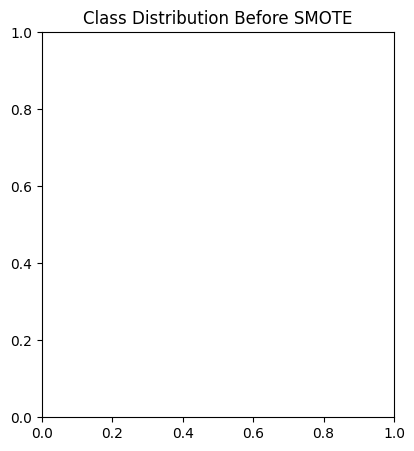

In [23]:
# Plot the class distribution before and after SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Class Distribution Before SMOTE")
plt.bar(class_distribution_before.keys(), class_distribution_before.values())
plt.xticks(list(class_distribution_before.keys()))
plt.xlabel("Class")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.title("Class Distribution After SMOTE")
plt.bar(class_distribution_after.keys(), class_distribution_after.values())
plt.xticks(list(class_distribution_after.keys()))
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
